In [43]:
import pandas as pd
#datadataset = pd.read_csv('C:/please add the location where this files are saved')
datadataset = pd.read_csv('C:/Users/nezim/PycharmProjects/code/data_base_plapbspaper.csv', engine='python')

In [44]:
#check the shape of data
dataset.shape

(194, 9)

In [45]:
dataset.head(13)

,MPs,Rhodb_filter_Red_component_percentile_90th,Rhodb_filter_Green_ component_percentile_90th,nilre_filter_Red_component_percentile_90th,DAPI_filter_Red_component_percentile_50th,DAPI_filter_ Green_ component_percentile_90th,DAPI_filter_ Blue_ component_percentile_90th,FITC_filter_ Green_ component_percentile_90th,FITC_filter_ Blue_ component_percentile_90th
0,OM,0.0000,0.0000,0.7676,0.0000,14.1895,22.3215,0.0000,0.0000
1,PAPER,0.0000,0.0000,0.0000,178.5325,177.9549,111.4207,0.0000,0.0000
2,PA,162.1620,125.0598,165.0538,0.0000,40.2492,64.0953,0.0000,0.0000
3,PA6,3.4433,2.8920,5.0061,0.0000,0.0000,0.0000,0.0000,0.0000
4,PETmono,4.2491,3.2417,0.0000,0.0000,47.1720,75.1594,0.0000,0.0000
5,PETp,0.0000,0.0000,0.0000,0.2930,61.6705,98.3685,0.0000,0.0000
6,PLA,142.9452,110.2697,112.9331,0.0000,34.7932,55.3701,0.0000,0.0000
7,PP,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,138.5009,21.2797
8,PS,248.2050,191.4780,251.2935,0.0000,0.0000,0.0000,65.6080,9.9274
9,PSf,0.0000,0.0000,0.0000,0.0000,93.5659,149.3881,0.0000,0.0000


In [46]:
data = dataset.sample(frac=0.80, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (155, 9)
Unseen Data For Predictions: (39, 9)


In [47]:
#setting up the environment in Pycaret
from pycaret.classification import *
exp_mclf101 = setup(data = data, target = 'MPs', session_id=123) 

,Description,Value
0,session_id,123
1,Target,MPs
2,Target Type,Multiclass
3,Label Encoded,"OM: 0, PA: 1, PA6: 2, PAPER: 3, PBS: 4, PE: 5, PETmono: 6, PETp: 7, PLA: 8, PP: 9, PS: 10, PSf: 11, PVC: 12"
4,Original Data,"(155, 9)"
5,Missing Values,False
6,Numeric Features,8
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [48]:
#comparation of models to identify best model
best = compare_models(fold=7)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9821,0.0000,0.9762,0.9732,0.9762,0.9803,0.9814,0.1171
rf,Random Forest Classifier,0.9732,0.0000,0.9643,0.9628,0.9658,0.9704,0.9726,0.1414
lr,Logistic Regression,0.9542,0.0000,0.9502,0.9481,0.9444,0.9492,0.9522,0.8043
nb,Naive Bayes,0.9458,0.0000,0.9156,0.9395,0.9390,0.9405,0.9442,0.0114
gbc,Gradient Boosting Classifier,0.9446,0.0000,0.9405,0.9338,0.9317,0.9390,0.9423,0.4543
dt,Decision Tree Classifier,0.9369,0.0000,0.9275,0.9335,0.9295,0.9304,0.9325,0.0114
knn,K Neighbors Classifier,0.9274,0.0000,0.9145,0.9116,0.9104,0.9196,0.9246,0.5343
lightgbm,Light Gradient Boosting Machine,0.9274,0.0000,0.9096,0.9134,0.9151,0.9199,0.9232,0.0757
lda,Linear Discriminant Analysis,0.8887,0.0000,0.8831,0.8699,0.8672,0.8768,0.8840,0.0086
ridge,Ridge Classifier,0.6095,0.0000,0.5332,0.4752,0.5122,0.5649,0.5852,0.0100


In [49]:
top3 = compare_models(fold=7,n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9821,0.0000,0.9762,0.9732,0.9762,0.9803,0.9814,0.1200
rf,Random Forest Classifier,0.9732,0.0000,0.9643,0.9628,0.9658,0.9704,0.9726,0.1429
lr,Logistic Regression,0.9542,0.0000,0.9502,0.9481,0.9444,0.9492,0.9522,0.1600
nb,Naive Bayes,0.9458,0.0000,0.9156,0.9395,0.9390,0.9405,0.9442,0.0114
gbc,Gradient Boosting Classifier,0.9446,0.0000,0.9405,0.9338,0.9317,0.9390,0.9423,0.4471
dt,Decision Tree Classifier,0.9369,0.0000,0.9275,0.9335,0.9295,0.9304,0.9325,0.0086
knn,K Neighbors Classifier,0.9274,0.0000,0.9145,0.9116,0.9104,0.9196,0.9246,0.0143
lightgbm,Light Gradient Boosting Machine,0.9274,0.0000,0.9096,0.9134,0.9151,0.9199,0.9232,0.0671
lda,Linear Discriminant Analysis,0.8887,0.0000,0.8831,0.8699,0.8672,0.8768,0.8840,0.0086
ridge,Ridge Classifier,0.6095,0.0000,0.5332,0.4752,0.5122,0.5649,0.5852,0.0071


In [50]:
print(top3)

[ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False), RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=Fa

In [51]:
dt = create_model('nb', fold = 7)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8125,0.0000,0.7308,0.8125,0.7917,0.7949,0.8052
1,0.8750,0.0000,0.7692,0.8750,0.8750,0.8632,0.8745
2,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9333,0.0000,0.9091,0.8889,0.9067,0.9254,0.9300
5,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
Mean,0.9458,0.0000,0.9156,0.9395,0.9390,0.9405,0.9442
Std,0.0704,0.0000,0.1096,0.0732,0.0772,0.0771,0.0725


In [52]:
dh = create_model('et', fold = 7)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9375,0.0000,0.9167,0.9062,0.9167,0.9310,0.9351
1,0.9375,0.0000,0.9167,0.9062,0.9167,0.9310,0.9351
2,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
Mean,0.9821,0.0000,0.9762,0.9732,0.9762,0.9803,0.9814
Std,0.0282,0.0000,0.0376,0.0424,0.0376,0.0312,0.0293


In [53]:
de = create_model('rf', fold = 7)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9375,0.0000,0.9167,0.9062,0.9167,0.9310,0.9351
1,0.8750,0.0000,0.8333,0.8333,0.8438,0.8621,0.8734
2,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
Mean,0.9732,0.0000,0.9643,0.9628,0.9658,0.9704,0.9726
Std,0.0455,0.0000,0.0607,0.0620,0.0575,0.0502,0.0463


In [54]:
tuned_dh = tune_model(de, fold=7)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9375,0.0000,0.9167,0.9062,0.9167,0.9310,0.9351
2,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9333,0.0000,0.9583,0.9667,0.9333,0.9268,0.9314
6,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
Mean,0.9815,0.0000,0.9821,0.9818,0.9786,0.9797,0.9809
Std,0.0292,0.0000,0.0304,0.0329,0.0342,0.0321,0.0302


In [55]:
tuned_de = tune_model(de, fold=7)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9375,0.0000,0.9167,0.9062,0.9167,0.9310,0.9351
2,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9333,0.0000,0.9583,0.9667,0.9333,0.9268,0.9314
6,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
Mean,0.9815,0.0000,0.9821,0.9818,0.9786,0.9797,0.9809
Std,0.0292,0.0000,0.0304,0.0329,0.0342,0.0321,0.0302


In [56]:
tuned_dt = tune_model(de, fold=7)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9375,0.0000,0.9167,0.9062,0.9167,0.9310,0.9351
2,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9333,0.0000,0.9583,0.9667,0.9333,0.9268,0.9314
6,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
Mean,0.9815,0.0000,0.9821,0.9818,0.9786,0.9797,0.9809
Std,0.0292,0.0000,0.0304,0.0329,0.0342,0.0321,0.0302


In [57]:
print(tuned_dt)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=4, max_features='sqrt', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0005,
                       min_impurity_split=None, min_samples_leaf=3,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       n_estimators=260, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)


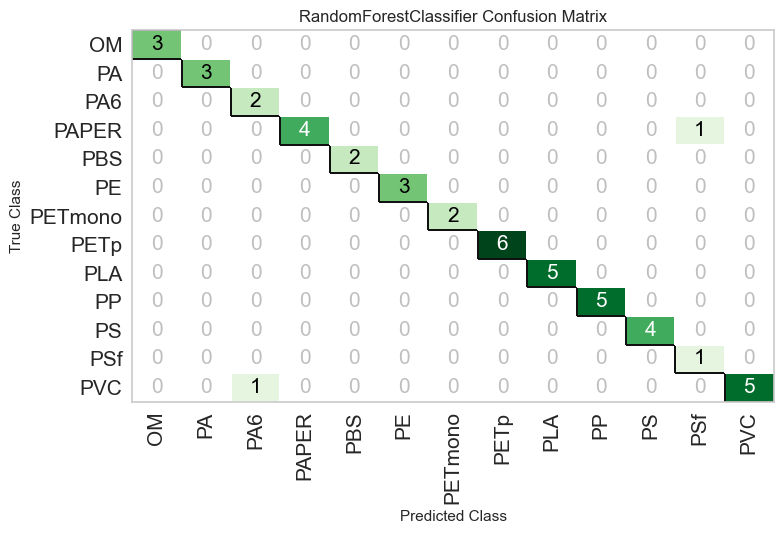

In [58]:
plot_model(tuned_dt, plot = 'confusion_matrix')

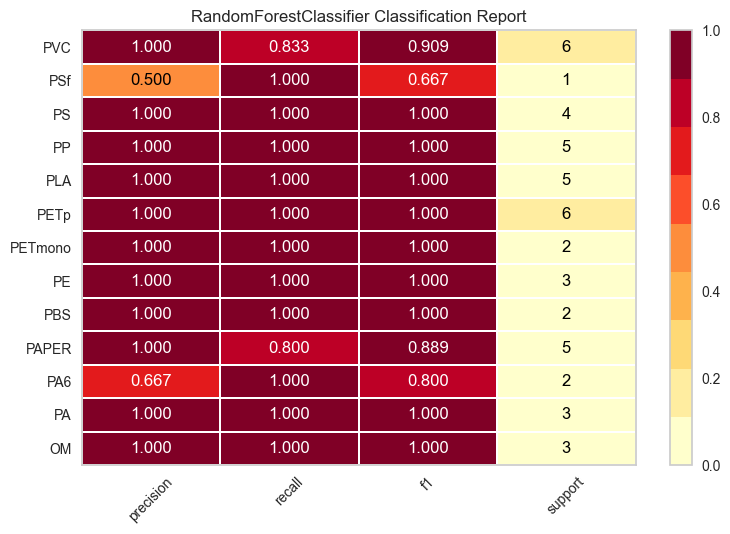

In [59]:
plot_model(tuned_dt, plot = 'class_report')

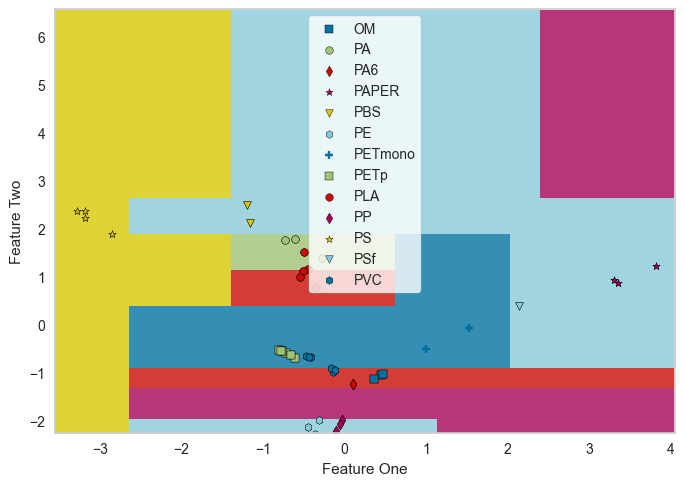

In [60]:
plot_model(tuned_dt, plot='boundary')

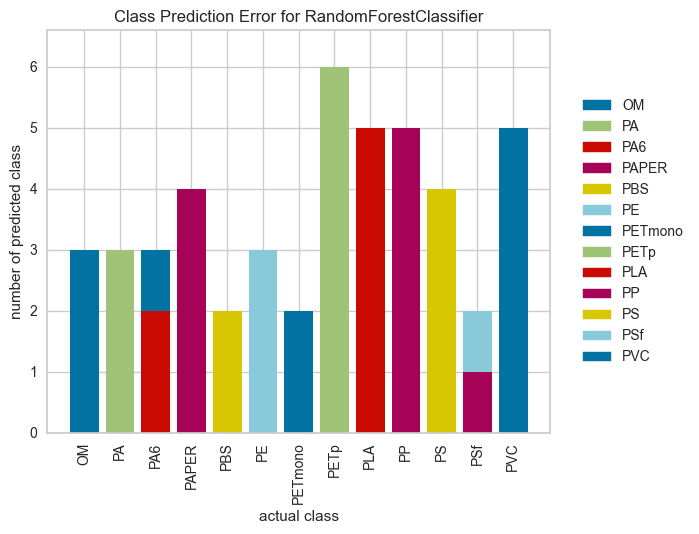

In [61]:
plot_model(tuned_dt, plot = 'error')

In [62]:
evaluate_model(tuned_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [63]:
predict_model(tuned_dt);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9574,0.9995,0.9718,0.9752,0.9610,0.9533,0.9543


In [64]:
rfcmodel1 = finalize_model(tuned_dt)

In [66]:
unseen_predictions = predict_model(rfcmodel1, data=data_unseen)
unseen_predictions.head(25)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.0000,0.9971,0,0,0,0,0


,MPs,Rhodb_filter_Red_component_percentile_90th,Rhodb_filter_Green_ component_percentile_90th,nilre_filter_Red_component_percentile_90th,DAPI_filter_Red_component_percentile_50th,DAPI_filter_ Green_ component_percentile_90th,DAPI_filter_ Blue_ component_percentile_90th,FITC_filter_ Green_ component_percentile_90th,FITC_filter_ Blue_ component_percentile_90th,Label,Score
0,PETp,0.0000,0.0000,0.0000,0.2930,61.6705,98.3685,0.0000,0.0000,PSf,0.4146
1,OM,0.0000,0.0000,0.8773,0.0000,10.0814,15.6921,0.0000,0.0000,OM,0.4932
2,PE,0.0000,0.0000,46.5731,0.0000,0.0000,0.0000,120.1185,18.5367,PE,0.4849
3,PETp,0.0000,0.0000,0.0000,0.2250,39.5128,62.9133,0.0000,0.0000,PSf,0.2973
4,PP,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,152.0678,23.3935,PP,0.7050
5,PBS,191.3940,147.4420,253.8330,0.4360,27.8810,44.3010,0.0000,0.0000,PS,0.4565
6,PP,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,164.2430,25.2803,PP,0.7517
7,PAPER,0.0000,0.0000,0.0000,94.1830,141.4881,88.6230,0.0000,0.0000,PAPER,0.9335
8,PSf,0.0000,0.0000,0.0000,0.0000,85.1973,136.0071,0.0000,0.0000,PSf,0.5051
9,PA6,3.9319,3.2819,3.8617,0.0000,0.0000,0.0000,0.0000,0.0000,PA6,0.4932


In [67]:
#saving the modelrfc
save_model(rfcmodel1,'Final etc Model 03March24')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='MPs',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy...
                  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                                         class_weight='balanced_subsample',
                                         criterion='gini', max_depth=4,
                                         max_features

In [68]:
saved_rfc4 = load_model('Final etc Model 03March24')

Transformation Pipeline and Model Successfully Loaded


In [69]:
new_prediction_cross = predict_model(saved_rfc4, data=data_unseen)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.0000,0.9971,0,0,0,0,0


In [70]:
new_prediction_cross.head(25)

,MPs,Rhodb_filter_Red_component_percentile_90th,Rhodb_filter_Green_ component_percentile_90th,nilre_filter_Red_component_percentile_90th,DAPI_filter_Red_component_percentile_50th,DAPI_filter_ Green_ component_percentile_90th,DAPI_filter_ Blue_ component_percentile_90th,FITC_filter_ Green_ component_percentile_90th,FITC_filter_ Blue_ component_percentile_90th,Label,Score
0,PETp,0.0000,0.0000,0.0000,0.2930,61.6705,98.3685,0.0000,0.0000,PSf,0.4146
1,OM,0.0000,0.0000,0.8773,0.0000,10.0814,15.6921,0.0000,0.0000,OM,0.4932
2,PE,0.0000,0.0000,46.5731,0.0000,0.0000,0.0000,120.1185,18.5367,PE,0.4849
3,PETp,0.0000,0.0000,0.0000,0.2250,39.5128,62.9133,0.0000,0.0000,PSf,0.2973
4,PP,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,152.0678,23.3935,PP,0.7050
5,PBS,191.3940,147.4420,253.8330,0.4360,27.8810,44.3010,0.0000,0.0000,PS,0.4565
6,PP,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,164.2430,25.2803,PP,0.7517
7,PAPER,0.0000,0.0000,0.0000,94.1830,141.4881,88.6230,0.0000,0.0000,PAPER,0.9335
8,PSf,0.0000,0.0000,0.0000,0.0000,85.1973,136.0071,0.0000,0.0000,PSf,0.5051
9,PA6,3.9319,3.2819,3.8617,0.0000,0.0000,0.0000,0.0000,0.0000,PA6,0.4932


In [36]:
dfram = pd.DataFrame(new_prediction_cross)

In [37]:
dfram.to_csv('prediction_unseen_data.csv')

In [39]:
paper_samples = pd.read_csv('C:/Users/nezim/PycharmProjects/code/data_base_paper_prep natsamples.csv', engine='python')

In [40]:
paper_samples

,MPs,Rhodb_filter_Red_component_percentile_90th,Rhodb_filter_Green_ component_percentile_90th,nilre_filter_Red_component_percentile_90th,DAPI_filter_Red_component_percentile_50th,DAPI_filter_ Green_ component_percentile_90th,DAPI_filter_ Blue_ component_percentile_90th,FITC_filter_ Green_ component_percentile_90th,FITC_filter_ Blue_ component_percentile_90th
0,GB_Particle1,1.816,1.644,2.043,0.000,105.495,168.461,0.000,0.000
1,GB_Particle2,0.000,0.000,2.330,0.000,132.345,211.378,7.800,0.000
2,GB_Particle3,0.000,0.000,0.000,5.792,4.716,0.000,0.000,0.000
3,GB_Particle4,5.700,4.716,0.000,0.000,100.653,160.690,0.000,0.000
4,GB_Particle5,117.063,90.361,114.711,0.000,31.094,49.456,15.992,2.038
5,GB_Particle6,0.000,0.000,0.000,0.000,0.000,0.000,33.883,4.973
6,Artificial_p1,3.606,3.119,0.000,0.000,26.742,42.452,0.000,0.000
7,Artificial_p2,0.000,0.000,0.000,0.000,29.850,47.466,0.000,0.200
8,Artificial_p3,0.000,0.000,2.318,0.000,39.123,62.328,0.000,2.727


In [41]:
paper_samples = predict_model(saved_rfc4, data=paper_samples)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.0000,0,0,0,0,0,0


In [42]:
paper_samples.head(10)

,MPs,Rhodb_filter_Red_component_percentile_90th,Rhodb_filter_Green_ component_percentile_90th,nilre_filter_Red_component_percentile_90th,DAPI_filter_Red_component_percentile_50th,DAPI_filter_ Green_ component_percentile_90th,DAPI_filter_ Blue_ component_percentile_90th,FITC_filter_ Green_ component_percentile_90th,FITC_filter_ Blue_ component_percentile_90th,Label,Score
0,GB_Particle1,1.816,1.644,2.043,0.000,105.495,168.461,0.000,0.000,PAPER,0.3255
1,GB_Particle2,0.000,0.000,2.330,0.000,132.345,211.378,7.800,0.000,PAPER,0.3796
2,GB_Particle3,0.000,0.000,0.000,5.792,4.716,0.000,0.000,0.000,OM,0.2317
3,GB_Particle4,5.700,4.716,0.000,0.000,100.653,160.690,0.000,0.000,PETmono,0.3587
4,GB_Particle5,117.063,90.361,114.711,0.000,31.094,49.456,15.992,2.038,PLA,0.3209
5,GB_Particle6,0.000,0.000,0.000,0.000,0.000,0.000,33.883,4.973,PETp,0.2203
6,Artificial_p1,3.606,3.119,0.000,0.000,26.742,42.452,0.000,0.000,PETmono,0.4455
7,Artificial_p2,0.000,0.000,0.000,0.000,29.850,47.466,0.000,0.200,OM,0.2995
8,Artificial_p3,0.000,0.000,2.318,0.000,39.123,62.328,0.000,2.727,OM,0.3648


In [44]:
dfram = pd.DataFrame(paper_samples)

In [45]:
#Creates a csv file with the results and it is saved automatically in the same folder
dfram.to_csv('paper_samples_prediction.csv')

In [124]:
artificial_sampless = pd.read_csv('C:/Users/nezim/PycharmProjects/percentile_calculator/percentile_results/data2.csv', engine='python')

In [125]:
artificial_samples = predict_model(saved_rfc4, data=artificial_sampless)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.0000,0,0,0,0,0,0


In [126]:
artificial_samples.head(10)

,MPs,Rhodb_filter_Red_component_percentile_90th,Rhodb_filter_Green_ component_percentile_90th,nilre_filter_Red_component_percentile_90th,DAPI_filter_Red_component_percentile_50th,DAPI_filter_ Green_ component_percentile_90th,DAPI_filter_ Blue_ component_percentile_90th,FITC_filter_ Green_ component_percentile_90th,FITC_filter_ Blue_ component_percentile_90th,Label,Score
0,PP,0.000,0.000,0.000,0,0.000,0.000,157.483,24.254,PP,0.7050
1,PP,0.000,0.000,0.000,0,0.000,0.000,120.903,18.559,PP,0.7346
2,PE102,142.338,109.799,147.041,0,35.069,55.819,23.741,3.400,PLA,0.3127
3,PLA,28.535,22.293,40.781,0,50.217,80.045,15.706,2.004,PA,0.2537
4,PP,0.000,0.000,0.000,0,6.391,10.047,100.813,15.423,PP,0.5616
5,PP,0.000,0.000,0.000,0,6.447,10.118,101.315,15.503,PP,0.5616
6,PS,248.014,191.366,249.374,0,3.000,4.000,54.586,8.204,PS,0.9338
7,PS,236.927,182.718,252.486,0,3.000,4.000,34.835,5.123,PS,0.9338
8,PVC,26.652,15.291,114.248,0,0.000,0.000,0.000,0.000,PVC,0.5364
9,PVC,22.043,17.434,105.909,0,0.000,0.000,0.000,0.000,PVC,0.5364


In [127]:
dfram = pd.DataFrame(artificial_samples)

In [128]:
dfram.to_csv('artificial_samples_prediction.csv')

In [129]:
thesisnat_sampless = pd.read_csv('C:/Users/nezim/PycharmProjects/percentile_calculator/percentile_results/natural_samples_gb.csv', engine='python')

In [130]:
thesisnat_sampless

,MPs,Rhodb_filter_Red_component_percentile_90th,Rhodb_filter_Green_ component_percentile_90th,nilre_filter_Red_component_percentile_90th,DAPI_filter_Red_component_percentile_50th,DAPI_filter_ Green_ component_percentile_90th,DAPI_filter_ Blue_ component_percentile_90th,FITC_filter_ Green_ component_percentile_90th,FITC_filter_ Blue_ component_percentile_90th
0,1_gb0595_r2,7.170,5.795,11.594,0,37.794,60.110,0.000,0.000
1,2_gb0595_r2,3.275,2.733,5.536,0,69.463,110.822,7.829,0.000
2,3_gb0595_r2,52.342,40.559,85.833,0,5.689,8.473,15.348,2.000
3,4_gb0595_r2,0.000,0.000,0.000,0,86.018,137.310,0.000,0.000
4,1_gb0595_r1,0.000,0.000,3.469,0,159.000,254.000,0.000,0.000
5,2_gb0595_r1,0.000,0.000,0.000,0,66.508,106.113,0.000,0.000
6,3_gb0595_r1,4.489,3.797,7.627,0,91.850,146.643,0.000,0.000
7,4_gb0595_r1,7.822,6.332,13.861,0,138.474,221.211,0.000,0.000
8,1_gb070_r2,2.894,2.485,10.814,0,0.000,0.000,0.000,0.000
9,2_gb070_r2,0.000,0.000,10.243,0,18.258,28.862,0.000,0.000


In [131]:
thesisnatural_samples = predict_model(saved_rfc4, data=thesisnat_sampless)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.0000,0,0,0,0,0,0


In [132]:
dfram = pd.DataFrame(thesisnatural_samples)

In [133]:
dfram.to_csv('naturalthesis_samples.csv')